Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

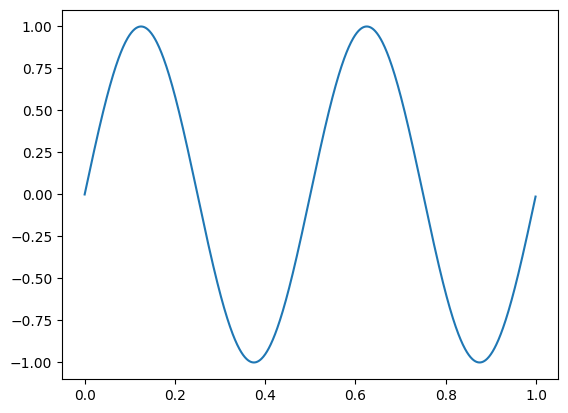

In [2]:
# Sampling rate - aliasing - sampling (Nyquist) theorem
# assume a sample rate of 1000, i.e. sampling 1000 times per second
sr = 1000
# construct a 1-sec time array that corresponds to this sample rate
t = np.arange(sr)/sr # question: how can we represent 2 seconds of audio? 2.3 secs?
# let's construct an audio array of one second with frequency 2
f = 2
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )

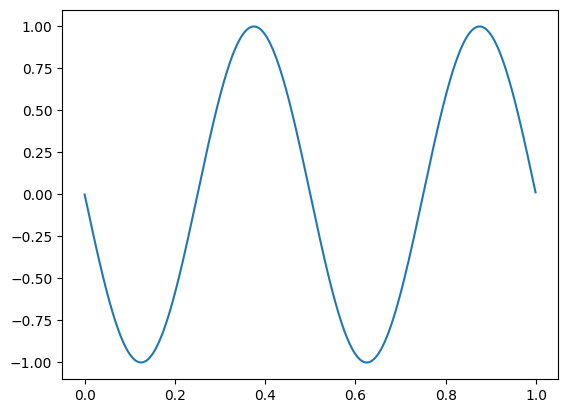

In [3]:
# now let's construct an audio array of one second with frequency 998
f = 998
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )
# what's going on?

<IPython.core.display.Javascript object>


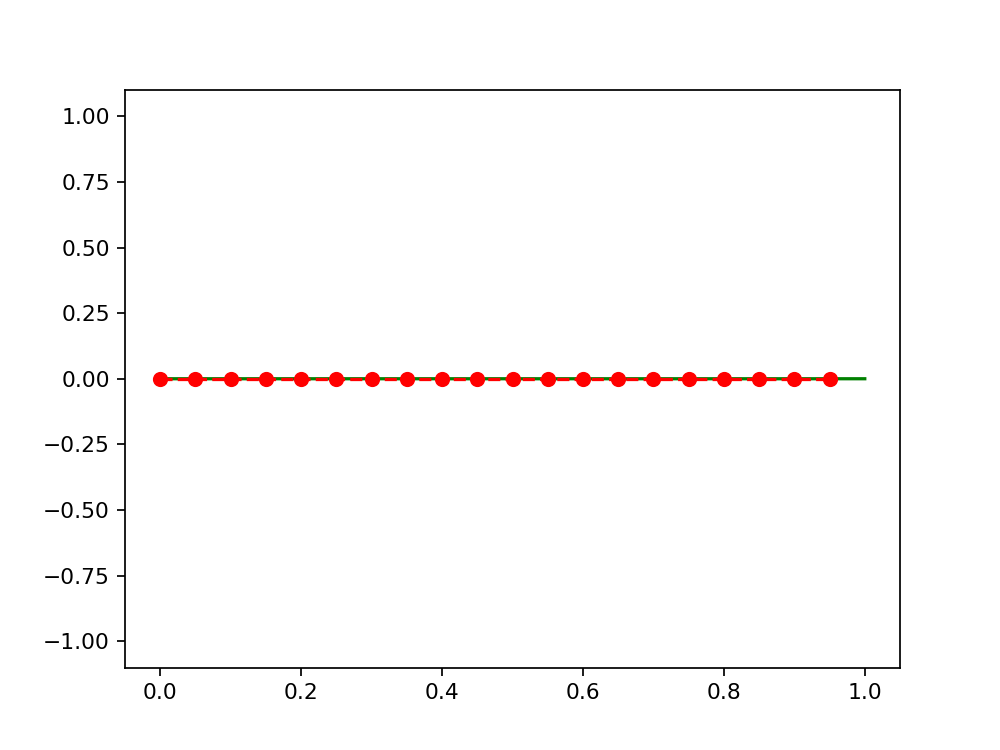

interactive(children=(IntSlider(value=0, description='f', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.change_freq(f=2)>

In [13]:
# see the following link to activate the interactive environment:
# https://ipywidgets.readthedocs.io/en/latest/user_install.html
# if using conda, make sure last version of matplolib is installed in conda
# conda install matplotlib
# conda update matplolib
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# assume an the approximation of an analog signal, using higher sample rate
analog_sr = 10000
# assume 1 second of an 'analog' recording
analog_t = np.arange( analog_sr )/analog_sr
# with frequency 50
f_real = 2
analog_s = np.sin( 2*np.pi*f_real*analog_t )
# plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_analog, = ax.plot( analog_t , analog_s, 'g' )
# assume that we are sampling at 100
digital_sr = 20
digital_t = np.arange( digital_sr )/digital_sr
# from analog_s, sample
digital_idxs = np.floor( digital_t*analog_sr ).astype(int)
digital_s = analog_s[ digital_idxs ]
line_digital, = ax.plot( digital_t , digital_s, 'ro--' )
# plt.savefig('aliasing.png', dpi=300)

def change_freq(f=2):
    analog_s = np.sin( 2*np.pi*f*analog_t )
    line_analog.set_ydata( analog_s )
    digital_s = analog_s[ digital_idxs ]
    line_digital.set_ydata( digital_s )
    # fig.canvas.draw()
    fig.show()
    return f

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_freq, f=widgets.IntSlider(min=0, max=50, step=1, value=0))

<IPython.core.display.Javascript object>


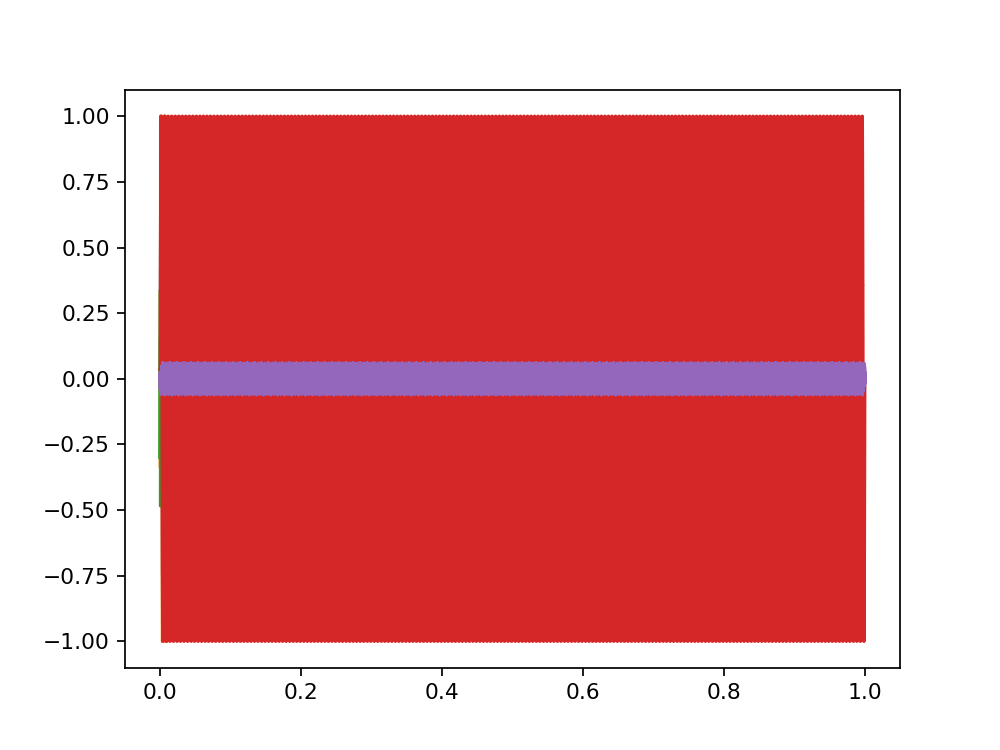

In [14]:
import time
import sounddevice as sd
# but the values of the audio samples per se are also digital
# the available values are defined by bitrate
sr = 44100
t = np.arange( sr )/sr
# set frequency
f = 200
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
fig = plt.figure()
# plot a small part
n = 441
plt.plot( t[:n] , s[:n] )
# assume 2-bit audio: 00, 01, 10, 11
s_2bit = np.floor( np.interp( s, (-1, 1), (0, 3.9999) ) )
s_2bit = np.interp( s_2bit, (0, 3), (-1, 1) )
plt.plot( t[:n] , s_2bit[:n] )
quant_noise = s - s_2bit
plt.plot( t[:n] , quant_noise[:n] )
# np.iinfo(np.int16).min

# remove comments to listen:
# initial audio
sd.play( s , sr )
time.sleep(1.5)
# 2bit quantized
sd.play( s_2bit , sr )
time.sleep(1.5)
# residual noise
sd.play( quant_noise , sr )


<IPython.core.display.Javascript object>


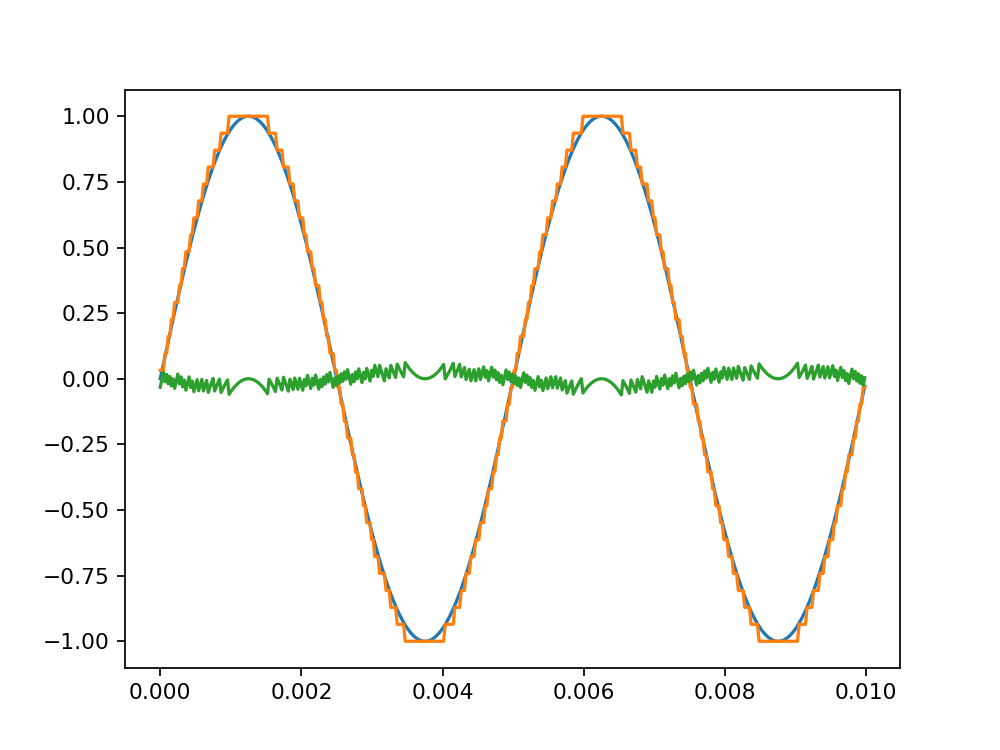

<IPython.core.display.Javascript object>

In [15]:
# assume n-bit audio
# set frequency
import time
f = 200
sr = 44100
t = np.arange( sr )/sr
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
bits_n = 5
s_nbit = np.floor( np.interp( s, (-1, 1), (0, 2**bits_n) ) )
s_nbit[ s_nbit >= 2**bits_n ] = (2**bits_n)-1
s_nbit = np.interp( s_nbit, (0, (2**bits_n)-1), (-1, 1) )
plt.plot( t , s_nbit )
quant_noise = s - s_nbit
plt.plot( t , quant_noise )
# np.iinfo(np.int16).min

fig = plt.figure()
plt.plot( t[:441] , s[:441] )
plt.plot( t[:441] , s_nbit[:441] )
plt.plot( t[:441] , quant_noise[:441] )
plt.show()

# just for running next cell
from IPython.display import Javascript
Javascript("var output_area = this; var cell_element = output_area.element.parents('.cell'); var cell_idx = Jupyter.notebook.get_cell_elements().index(cell_element); Jupyter.notebook.execute_cells([cell_idx+1]);")

Signal-to-noise ratio (SNR) indicates how much of the signal is "lost" or how much noise is added to the original signal by a process (e.g., long cable leakage, or poor microphone quality, or quantization). In the case of quantization, SNR is measured by dividing the dBs of the "green" line with the dBs of the blue line.

In [16]:
sd.play( s , sr )
time.sleep(1.5)
sd.play( s_nbit , sr )
time.sleep(1.5)
sd.play( quant_noise , sr )